# Working with output from many different CMIP6 climate models

In [1]:
from xmip.preprocessing import combined_preprocessing

In [2]:
from xmip.utils import google_cmip_col
col = google_cmip_col()
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [3]:
# create a smaller catalog from the full collection using faceted search
cat = col.search(
    variable_id='tas', # atmospheric surface temperature
    experiment_id='historical', # only runs for the historical forcing period
    table_id='Amon', # monthly atmospheric data
    source_id=['IPSL-CM6A-LR', 'MRI-ESM2-0', 'GFDL-ESM4'], # only choosing a few models here, there are many more!
    member_id=['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1'],
    )
# TODO: Some text on the vocabulary
# read all datasets into a dictionary but apply the xmip preprocessing before
ddict = cat.to_dataset_dict(preprocess=combined_preprocessing, xarray_open_kwargs={'use_cftime':True}) 



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/Users/juliusbusecke/miniconda/envs/earth-env-data-science-book/lib/python3.10/site-packages/google/auth/_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/juliusbusecke/miniconda/envs/earth-env-data-science-book/lib/python3.10/site-packages/google/auth/_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is a

In [4]:
list(ddict.keys())

['CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1',
 'CMIP.MRI.MRI-ESM2-0.historical.Amon.gn']

You can see that we have three different models. Lets look at them in a bit more detail to understand the layout:

In [5]:
ddict['CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr']

<xarray.Dataset>
Dimensions:         (member_id: 5, dcpp_init_year: 1, time: 1980, y: 143,
                     x: 144, bnds: 2)
Coordinates:
    height          float64 2.0
  * y               (y) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * x               (x) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time            (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds     (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon             (x, y) float32 360.0 360.0 360.0 360.0 ... 357.5 357.5 357.5
    lat             (x, y) float32 -90.0 -88.73 -87.46 ... 87.46 88.73 90.0
  * member_id       (member_id) object 'r1i1p1f1' 'r2i1p1f1' ... 'r5i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds
Data variables:
    tas             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 143, 144), meta=np.ndarray>
Attributes: (12/53)
    CMIP6_CV_version:                 cv=6.2.3.5-2-g63b123e
    Conventions:                      CF-1.7 CMIP-6.2
    EXPID:                            historical
    NCO:                              "4.6.0"
    activity_id:                      CMIP
    branch_method:                    standard
    ...                               ...
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20180803
    intake_esm_attrs:_data_format_:   zarr
    variant_info:                     Restart from another point in piControl...
    intake_esm_dataset_key:           CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr

In [6]:
ddict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1']

<xarray.Dataset>
Dimensions:         (member_id: 3, dcpp_init_year: 1, time: 1980, y: 180,
                     x: 288, bnds: 2, vertex: 4)
Coordinates: (12/13)
    height          float64 2.0
  * y               (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds      (y, bnds, x) float64 dask.array<chunksize=(180, 2, 288), meta=np.ndarray>
  * x               (x) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
    lon_bounds      (x, bnds, y) float64 dask.array<chunksize=(288, 2, 180), meta=np.ndarray>
  * time            (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    ...              ...
    lon             (x, y) float64 0.625 0.625 0.625 0.625 ... 359.4 359.4 359.4
    lat             (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies   (vertex, x, y) float64 dask.array<chunksize=(1, 288, 180), meta=np.ndarray>
    lat_verticies   (vertex, x, y) float64 dask.array<chunksize=(1, 288, 180), meta=np.ndarray>
  * member_id       (member_id) object 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds, vertex
Data variables:
    tas             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 429, 180, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    comment:                          <null ref>
    contact:                          gfdl.climate.model.info@noaa.gov
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gr1
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amo...

You can see that both datasets have the same names for many of the coordinates (e.g. 'x' and 'y' for the logical indices in zonal and meridional direction). This is actually not quite the case for the raw CMIP6 data, which is why [xMIP](https://github.com/jbusecke/xMIP) was developed in an effort to crowdsource these common data-cleaning tasks. For this example we only use the `combined_preprocessing` function which fixes some of the naming, but check out the [docs](https://cmip6-preprocessing.readthedocs.io/en/latest/?badge=latest) to see more helpful code for CMIP analysis.

Ok but now lets analyze the data! Using what we know about xarray we can get a timeseries of the global surface temperature:

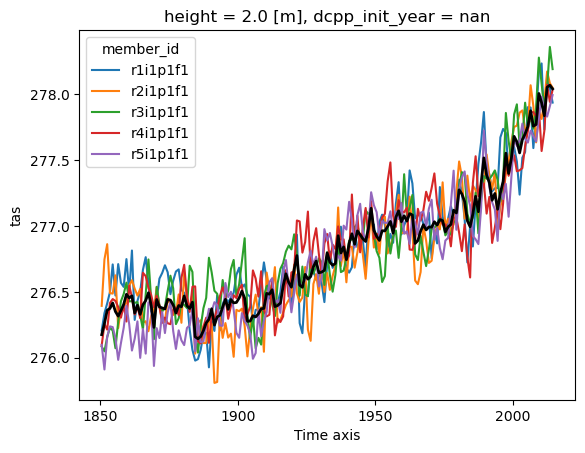

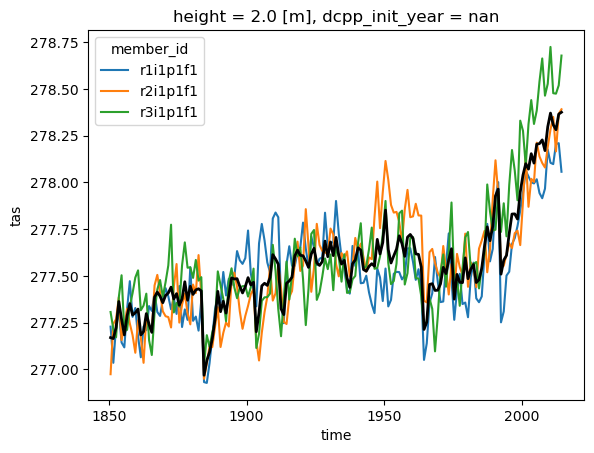

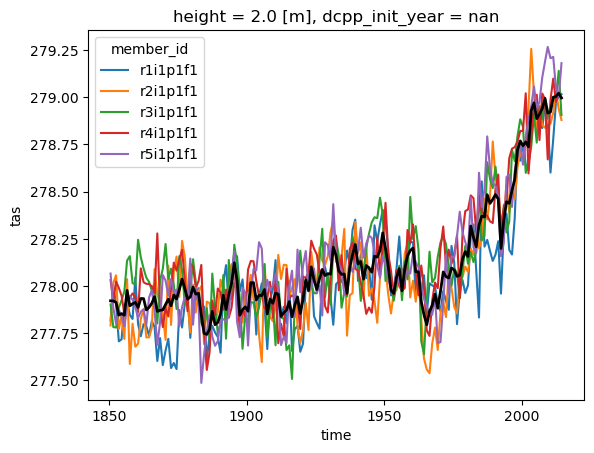

In [20]:
import matplotlib.pyplot as plt
for name, ds in ddict.items():
    # construct yearly global mean timeseries
    mean_temp = ds.tas.mean(['x', 'y']).coarsen(time=12).mean()
    plt.figure()
    mean_temp.plot(hue='member_id')
    # lets also plot the average over all members
    mean_temp.mean('member_id').plot(color='k', linewidth=2)


But wait! This is not exactly right. We need to weight the spatial mean by the area of each grid cell, since the area varies based on the position on the globe (and the particularities of the curvilinear grid used in each model). But we can easily query the cell area from the cloud and match them to the data using xmip

In [8]:
# create a smaller catalog from the full collection using faceted search
cat_area = col.search(
    variable_id='areacella', # atmospheric surface temperature
    experiment_id='historical', # only runs for the historical forcing period
    table_id='fx', # monthly atmospheric data
    source_id=['IPSL-CM6A-LR', 'MRI-ESM2-0', 'GFDL-ESM4'], # only choosing a few models here, there are many more!
    member_id=['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1'],
    )
# TODO: Some text on the vocabulary
# read all datasets into a dictionary but apply the xmip preprocessing before
ddict_area = cat_area.to_dataset_dict(preprocess=combined_preprocessing, xarray_open_kwargs={'use_cftime':True}) 


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/Users/juliusbusecke/miniconda/envs/earth-env-data-science-book/lib/python3.10/site-packages/google/auth/_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/juliusbusecke/miniconda/envs/earth-env-data-science-book/lib/python3.10/site-packages/google/auth/_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is a

/Users/juliusbusecke/miniconda/envs/earth-env-data-science-book/lib/python3.10/site-packages/google/auth/_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/juliusbusecke/miniconda/envs/earth-env-data-science-book/lib/python3.10/site-packages/google/auth/_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is a

In [9]:
list(ddict_area.keys())

['CMIP.IPSL.IPSL-CM6A-LR.historical.fx.gr',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.fx.gr1',
 'CMIP.MRI.MRI-ESM2-0.historical.fx.gn']

You can inspect the new dictionary `ddict_area` and will find that the structure is very similar to the one for surface temperature above.

In [10]:
# !pip install -e ~/Code/xmip

In [12]:
from xmip.postprocessing import match_metrics

ddict_w_area = match_metrics(ddict, ddict_area, 'areacella', dim_length_conflict='align')

/Users/juliusbusecke/Code/xMIP/xmip/postprocessing.py:83: UserWarning: Match attributes ['variant_label'] not found in any of the datasets.         This can happen when several combination functions are used and attributes are removed during merging.         Double check the results.
  warnings.warn(
/Users/juliusbusecke/Code/xMIP/xmip/postprocessing.py:571: UserWarning: CMIP.NOAA-GFDL.GFDL-ESM4.historical.none.Amon.gr1.none.tas:`metric` dimensions ['member_id:1'] do not match `ds` ['member_id:3']. Aligning the data on `inner`
  warnings.warn(msg + " Aligning the data on `inner`")


In [16]:
ddict_w_area['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1']

<xarray.Dataset>
Dimensions:         (y: 162, x: 257, time: 1980, member_id: 1,
                     dcpp_init_year: 1, bnds: 2, vertex: 4)
Coordinates: (12/14)
  * y               (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * x               (x) float64 0.625 3.125 4.375 5.625 ... 356.9 358.1 359.4
  * time            (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
    height          float64 2.0
    ...              ...
    time_bounds     (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon             (x, y) float64 0.625 0.625 0.625 0.625 ... 359.4 359.4 359.4
    lat             (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies   (vertex, x, y) float64 dask.array<chunksize=(1, 257, 162), meta=np.ndarray>
    lat_verticies   (vertex, x, y) float64 dask.array<chunksize=(1, 257, 162), meta=np.ndarray>
    areacella       (member_id, dcpp_init_year, y, x) float32 dask.array<chunksize=(1, 1, 162, 257), meta=np.ndarray>
Dimensions without coordinates: bnds, vertex
Data variables:
    tas             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 429, 162, 257), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    comment:                          <null ref>
    contact:                          gfdl.climate.model.info@noaa.gov
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gr1
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amo...

Ok the dataset now has a matching `areacella` coordinate that we can use to weight our results

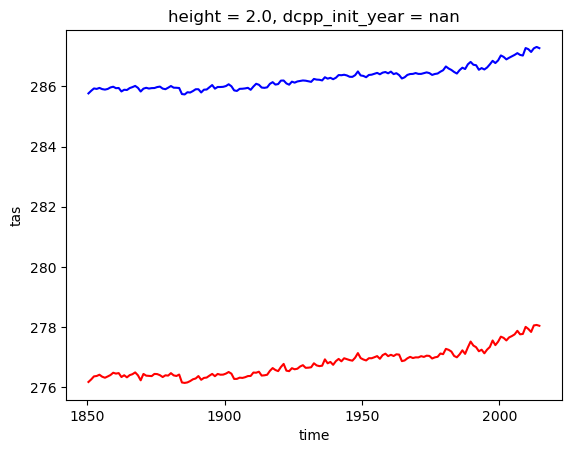

In [22]:
for name, ds in ddict_w_area.items():
    # construct yearly global mean timeseries
    mean_temp = ds['tas'].mean(['x', 'y']).coarsen(time=12).mean()
    mean_temp_weighted = ds['tas'].weighted(ds.areacella).mean(['x', 'y']).coarsen(time=12).mean()
    plt.figure()
    # lets look at the difference
    mean_temp.mean('member_id').plot(label = 'unweighted', color='r')
    mean_temp_weighted.mean('member_id').plot(label = 'unweighted', color='b')
    plt.legend()
    break

Ok lets finish with one nice (properly weighted) plot of all models

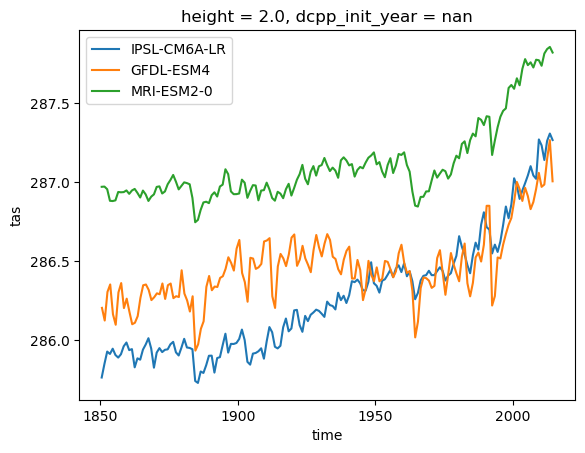

In [25]:
plt.figure()
for name, ds in ddict_w_area.items():
    # construct yearly global mean timeseries
    mean_temp_weighted = ds['tas'].weighted(ds.areacella).mean(['x', 'y']).coarsen(time=12).mean()
    mean_temp_weighted.mean('member_id').plot(label = ds.attrs['source_id'])
plt.legend()